In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
 

# Tenemos la siguiente pregunta, un grupo de sociologos reunieron datos para ver 
# si las clases sen linea son malas o buenas, tomando como métrica un examen
# Puedo ver el promedio de los examenes y usarlo como métrica definitoria
data = pd.read_csv("online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]


In [2]:
# Promedio y longitud presencial
(face_to_face.mean(), len(face_to_face))

(78.54748458333333, 120)

In [3]:
# Promedio y tamaño online
(online.mean(), len(online))

(73.63526308510637, 94)

Diferencia entre los promedios, ¿esto es confiable?

In [4]:
face_to_face.mean() - online.mean()

4.912221498226955

La verdad es que no tengo muchos datos, recolectar más muchas veces es complicado y costoso. Necesito una conclusión.

**La diferencia promedio entre online y presencial es significativa, si o no ***

¿Cómo le puedo hacer?

### Teorema central del límite

Los promedios siguen una distribución normal

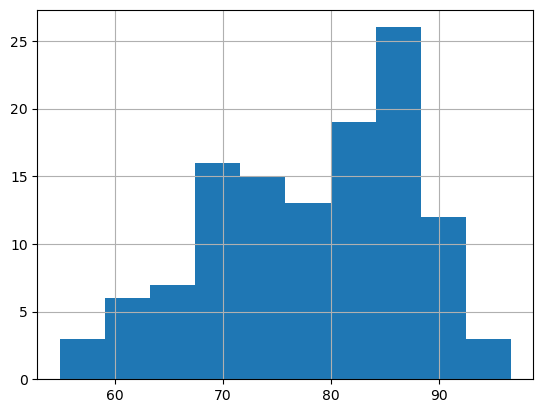

In [6]:
## Ejemplo, face to face no es normal
face_to_face.hist();

Pero si lo resampleo y tomo sus promedios si sería normal

In [7]:
promedios = []
for i in range(1000):
    promedios.append(face_to_face.sample(len(face_to_face), replace=True).mean())

promedios

[78.28982691666667,
 76.95057625,
 77.35823391666666,
 79.03240050000001,
 77.58614033333333,
 78.31521749999999,
 78.47956725,
 78.31090216666666,
 79.03481141666667,
 78.77090833333332,
 79.39540766666666,
 78.79798466666666,
 77.70949008333334,
 78.74073533333333,
 79.78957783333335,
 77.68331058333334,
 79.15881075,
 79.19281950000001,
 79.07740258333334,
 78.44931608333333,
 79.65747849999998,
 79.17179275,
 79.10482474999999,
 79.39449158333333,
 78.67949075,
 79.58381899999999,
 78.47631591666666,
 78.45032116666668,
 78.41924233333333,
 78.35222691666668,
 78.51915133333333,
 79.03323483333334,
 78.74615058333332,
 79.39566108333335,
 78.07241066666667,
 76.51174341666666,
 79.70106925,
 77.76924224999999,
 79.45047625,
 77.92457566666667,
 78.97974141666667,
 77.05889991666666,
 79.80890124999999,
 78.84131166666667,
 78.49106941666668,
 77.08756841666667,
 79.0064105,
 78.54265074999999,
 79.92865875000001,
 78.82940475,
 80.20182708333333,
 77.54832549999999,
 78.01822566666

Los promedios mágicamente siguen una distribución normal

### Error estandard

El error estandard sería la desviación estandard de los promedios posibles


Si $X$ son $n$ observaciones independientes con una media $\mu$ y una varianza $\sigma^2$

$T = (X_1 + X_2 + X_3 + ... + X_n)$

$Var(T) = n\sigma^2$

$Var(\frac{T}{n}) = Var(\frac{1}{n} * T) = \frac{1}{n^2} * Var(T) = \frac{1}{n^2} * n\sigma^2  = \frac{\sigma^2}{n}$

Ojo: la varianza de $\frac{T}{n}$ es la varianza de los promedios


La desviación estandard de lo anterior sería:

$Sd(\frac{T}{n}) = \frac{\sigma}{\sqrt{n}}$

In [15]:
### Error estandard de face to face


In [16]:
# La desvición estandard de nuestra simulación debe ser muy similar


In [17]:
# Si usamos pandas


### Explicar que es el error estandard

Tenemos una muestra de datos la cual pertenece a una muestra mayor la cual no conocemos.

Los promeddios posibles de esa muestra hipotetica de datos siguen una _distribución normal_ por el teorema central del límite  

Matemáticamente sabemos que la desviación estandard de ese promedio desconocido es el error estandard



#### Aplicando el error estandard

Si los promedios de mis datos siguen una distribución normal, puedo sacar algunas conclusiones interesantes. 

Sabemos que dentro de una distribución normal
- 1 desviación estandard estan 66% de los datos
- 2 desviaciones estandard están 95% de los datos
- 3 desviaciones estandard estan 99% de los datos





In [18]:
# Error estandard de las variables en cuestión


### Intervalo de confianza

Dame el intervalo de confianza al 95% del promedio de clases en linea y presencial


### Prueba de hipotesis

Al sumar dos variables normaes:

$N(\mu_1, \sigma^2_1) + N(\mu_2, \sigma^2_2)  = N(\mu_1 + \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Y al restar
$N(\mu_1, \sigma^2_1) - N(\mu_2, \sigma^2_2)  = N(\mu_1 - \mu_2, \sigma^2_1 + \sigma^2_2)$ 

Si no me creen:

histtype='step'

In [21]:
np.random.seed(123)
df_normals = pd.DataFrame({
    'n1': np.random.normal(4, 3, 30000),
    'n2': np.random.normal(1, 4, 30000)
})


En este caso, sabemos que *los promedios* tienen una distribución normal 

En este momento yo tengo dos promedios con sus respectivas desviaciones estandard, quiere decir que puedo combinar la distribución de las clases online y presencial. 

Al hacer esta combinación podría sacar estadísticas interesantes.

¿Las diferencias entre online y presencial como se ven? ¿Cuál es su distribución ¿Eso me puede ayudar a determinar que es mejor?


$\mu_{diff} = \mu_1 - \mu_2 $

$SE_{diff} = \sqrt{SE^2_1 + SE^2_2}$

In [22]:
### Mu diff

## SE diff

# CI


stats.norm.pdf
plt.vlines

In [23]:
## Visualizando 


Con esto en mano, podemos decir que hay un 95% de confianza de que la verdadera diferencia en medias de online y clases presenciales este entre -8.37 y -1.44



#### Repasando: estadístico Z
Si X es una variable aleatoria normalmente distribuida y $X ~ N(μ, σ)$, entonces la puntuación z para una determinada $x$ es:

$z = \frac{x - \mu}{\sigma}$


Como han visto en sus otras clases, hacer algo "normal estandard" es simplemente escalar sus datos a que tengan media 0 y varianza 1




#### Adaptnado esto al problema

Podría transformar las diferencias entre online y presencial a una distribución nor,al estandard, _asumiendo que la diferencia real es 0_ (lingo estadístico: la hipotesis nula $H_0$=0).

Al hacer esto, puedo ver que tan extremo se ve esta diferencia en la distribución normal estandard, si da muy extremo entonces seria raro y podemos calcular la probabilidad de que sea azar.

- $x$ serían las diferencias 
- $\mu$ sería 0, ya que quiero ve tan probable es esto
- $\sigma$ sería el error estandard de las diferencias 

De esto:

$z = \frac{x - \mu}{\sigma}$

Pasamos a esto:


$z = \frac{\mu_{diff} - H_0}{SE_{diff}}$

Dado que mi hipotesis es que los promedios _no varían_, $H_0 = 0$ 

$z = \frac{\mu_{diff}}{SE_{diff}}$




In [24]:
# Calcula el estadístico Z


En una distribución normal estandard, este resultado Z es bastante extremo no parece ser resultado de azar

stats.norm.cdf

In [25]:
# Obten el p value


In [26]:
## Probabilidad de que las diferencias entre desempeños sean producto del azar


In [28]:
## Crea un código base para el AB test
def AB_test(test, control):
    # Mu
    
    # SE
    
    # Differences
    
    # Z score and p value 
    
    return

    
AB_test(online, face_to_face)